**Author: ZHONG, Ziyu**

# Problem 2: MDS experiments

## (a) Input a few cities to a matrix

[Beijing, Shanghai, Guangzhou, Hongkong, Chongqing, Chengdu, Nanjing, Nanchang, Wuhan, Lanzhou]

In [1]:
import numpy as np

Construct squared distance matrix D

In [2]:
cities = ['Beijing', 'Shanghai', 'Guangzhou', 'Hongkong', 'Chongqing', 'Chengdu', 'Nanjing', 'Nanchang', 'Wuhan', 'Lanzhou']
N = 10
d = np.zeros((N,N),dtype='float32')
d[0,:] = [0,1070.48,1890.71,1973.70,1456.94,1516.95,902.02,1251.68,1057.09,1183.50]
d[1,:] = [0,0,1206.63,1227.83,1434.20,1655.61,268.02,604.97,687.30,1716.84]
d[2,:] = [0,0,0,129.70,978.00,1239.67,1129.45,669.37,834.25,1703.63]
d[3,:] = [0,0,0,0,1107.63,1369.30,1178.23,732.26,922.97,1830.14]
d[4,:] = [0,0,0,0,0,272.16,1195.31,907.01,746.95,767.73]
d[5,:] = [0,0,0,0,0,0,1403.99,1161.62,975.69,599.45]
d[6,:] = [0,0,0,0,0,0,0,466.67,458.49,1449.03]
d[7,:] = [0,0,0,0,0,0,0,0,262.39,1398.64]
d[8,:] = [0,0,0,0,0,0,0,0,0,1147.24]
d = d+d.T
D = np.square(d)
D

array([[      0.  , 1145927.4 , 3574784.2 , 3895491.5 , 2122674.  ,
        2301137.2 ,  813640.1 , 1566703.  , 1117439.2 , 1400672.2 ],
       [1145927.4 ,       0.  , 1455956.  , 1507566.4 , 2056929.5 ,
        2741044.5 ,   71834.71,  365988.66,  472381.28, 2947539.5 ],
       [3574784.2 , 1455956.  ,       0.  ,   16822.09,  956484.  ,
        1536781.9 , 1275657.2 ,  448056.2 ,  695973.06, 2902355.2 ],
       [3895491.5 , 1507566.4 ,   16822.09,       0.  , 1226844.2 ,
        1874982.6 , 1388225.9 ,  536204.75,  851873.56, 3349412.5 ],
       [2122674.  , 2056929.5 ,  956484.  , 1226844.2 ,       0.  ,
          74071.07, 1428766.1 ,  822667.2 ,  557934.3 ,  589409.3 ],
       [2301137.2 , 2741044.5 , 1536781.9 , 1874982.6 ,   74071.07,
              0.  , 1971187.9 , 1349361.  ,  951971.  ,  359340.3 ],
       [ 813640.1 ,   71834.71, 1275657.2 , 1388225.9 , 1428766.1 ,
        1971187.9 ,       0.  ,  217780.9 ,  210213.08, 2099688.  ],
       [1566703.  ,  365988.66,  448056.2

## (b) Implement MDS for D

K = -1/2*HDH

In [3]:
H = np.eye(N) - 1/N*np.ones((N,N),dtype='float32')
K = -0.5*np.matmul(np.matmul(H,D),H)

Solve out eigenvalues & eigenvectors of K

In [4]:
lmd, V = np.linalg.eigh(K)

Sort eigenvalues in descending order

In [5]:
index_lmd = np.argsort(lmd)[::-1]
lmd[index_lmd]

array([ 3.28195895e+06,  2.78333897e+06,  1.77565881e+03,  6.16775961e+00,
        1.85764003e+00, -2.67828617e-07, -1.94665125e+00, -6.80692427e+00,
       -2.07854539e+03, -5.89680398e+03])

Choose top k eigenvalues,calculate $Z_k = \Lambda^{1/2}V^T$

In [6]:
k = 2
lmd_k = lmd[index_lmd[:k]]
V_k = V[:,index_lmd[:k]]
Z_k = np.transpose(np.sqrt(lmd_k)*V_k)
Z_k

array([[-725.50851621,  346.36719393,  717.93531683,  845.09773923,
        -248.0035092 , -490.87695373,  144.0793705 ,  328.64601065,
          67.27400005, -985.01067101],
       [ 814.83170066,  743.06073638, -406.66919895, -380.85466218,
        -562.57851993, -685.47017106,  566.80264635,  138.05719359,
         114.80082279, -341.9805475 ]])

## (c) Plot the normalized eigenvalues

Text(0, 0.5, 'normalized_lmd')

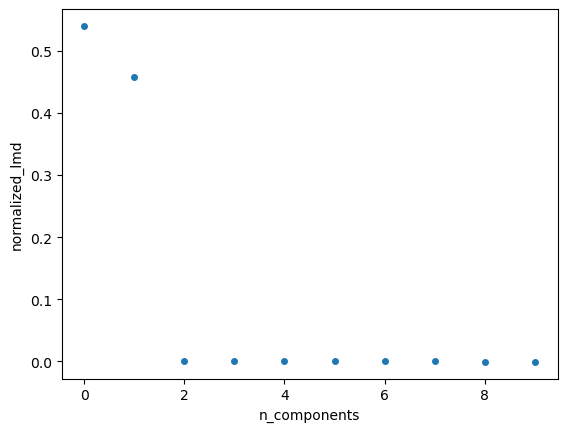

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
norm_lmd = lmd[index_lmd]/np.sum(np.abs(lmd))
plt.plot(norm_lmd, "o", markersize=4)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('normalized_lmd')

Observe that there are a few negative eigenvalues, since D is not S.D.P. Thus it is not Eulidean
embeddable.

## (d) Make a scatter plot

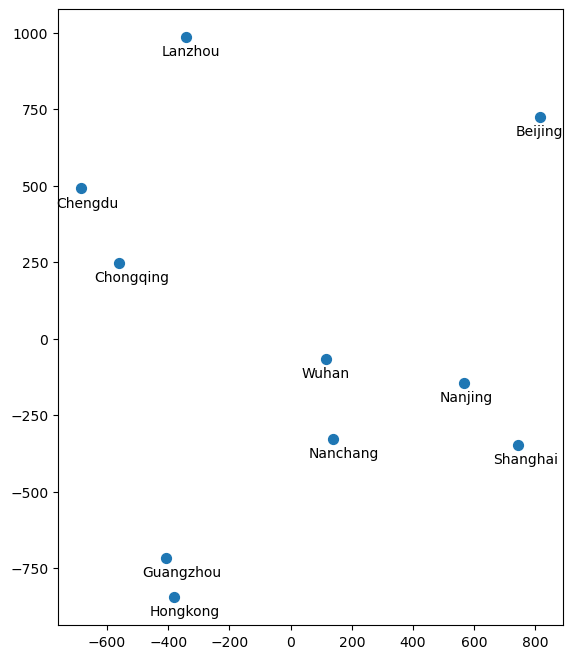

In [8]:
x = Z_k[1] # shift the axis to make the figure fit reality
y = -Z_k[0]
plt.figure(figsize=(8, 8), dpi=100)
ax = plt.gca()
ax.set_aspect(1)
plt.scatter(x, y, s=50, marker='o')
for i in range(N):
    plt.annotate(cities[i], xy = (x[i], y[i]), xytext = (x[i]-80, y[i]-60))